In [38]:
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Load training data from tfds
(ds_train, ds_validation), ds_info = tfds.load(
    'mnist',
    split=['train', 'test'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True,
)

# Rescale training and validation data
ds_rescale_map = lambda img, label: (tf.cast(img, tf.float32) / 255.0, label)
ds_train = ds_train.map(ds_rescale_map, num_parallel_calls=tf.data.AUTOTUNE)
ds_validation = ds_validation.map(ds_rescale_map, num_parallel_calls=tf.data.AUTOTUNE)

# Setup batching
batch_size = 128

ds_train = ds_train.cache()
ds_train = ds_train.shuffle(1000)
ds_train = ds_train.batch(batch_size)
ds_train = ds_train.prefetch(tf.data.AUTOTUNE)

ds_validation = ds_validation.batch(batch_size)
ds_validation = ds_validation.cache()
ds_validation = ds_validation.prefetch(tf.data.AUTOTUNE)

In [55]:
# Setup model
model = tf.keras.models.Sequential([
    tf.keras.layers.InputLayer(input_shape=(28,28,1)),
    tf.keras.layers.Conv2D(28, (3,3), activation='relu', input_shape=(batch_size,28,28,1)),
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dense(10)
])

# Compile and fit model
learning_rate = 0.001
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics='accuracy'
)

model.fit(
    ds_train,
    epochs=4,
    validation_data=ds_validation
)

Epoch 1/4
469/469 [==============================] - 8s 16ms/step - loss: 0.2014 - accuracy: 0.9410 - val_loss: 0.0792 - val_accuracy: 0.9754
Epoch 2/4
469/469 [==============================] - 8s 17ms/step - loss: 0.0646 - accuracy: 0.9814 - val_loss: 0.0615 - val_accuracy: 0.9788
Epoch 3/4
469/469 [==============================] - 9s 18ms/step - loss: 0.0411 - accuracy: 0.9881 - val_loss: 0.0574 - val_accuracy: 0.9800
Epoch 4/4
469/469 [==============================] - 10s 21ms/step - loss: 0.0270 - accuracy: 0.9922 - val_loss: 0.0567 - val_accuracy: 0.9822


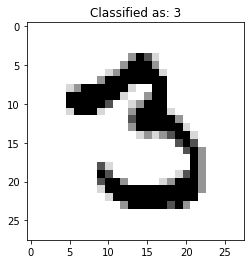

In [63]:
# Load test data and rescale
ds_test = np.load('../xTest2.npy').astype('float32')
ds_test /= 255.0

# Move last axis to make compatible with predict function
ds_test = np.moveaxis(ds_test, -1, 0)
classifications = model.predict(ds_test)
classifications = classifications.argmax(1) # Get label
example_idx = np.random.randint(ds_test.shape[0])

original_img = plt.imshow(ds_test[example_idx,:,:,0], cmap='Greys')
plt.title('Classified as: {}'.format(classifications[example_idx]))
plt.show()

classifications.tofile('classifications.csv', sep=',')